In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torch import nn
from torchvision import datasets, transforms, models
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

Cloning into 'ants_and_bees'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 45.03 MiB | 25.33 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls

ants_and_bees  sample_data


In [ ]:
!ls ants_and_bees


train  val


In [ ]:
!ls ants_and_bees/train

ants  bees


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the paths to the training and validation data
train_dir = 'ants_and_bees/train'
val_dir = 'ants_and_bees/val'

# Define the parameters for the image data generator
batch_size = 32
img_height = 224
img_width = 224


train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
val_generator = val_datagen.flow_from_directory(
    val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')



Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


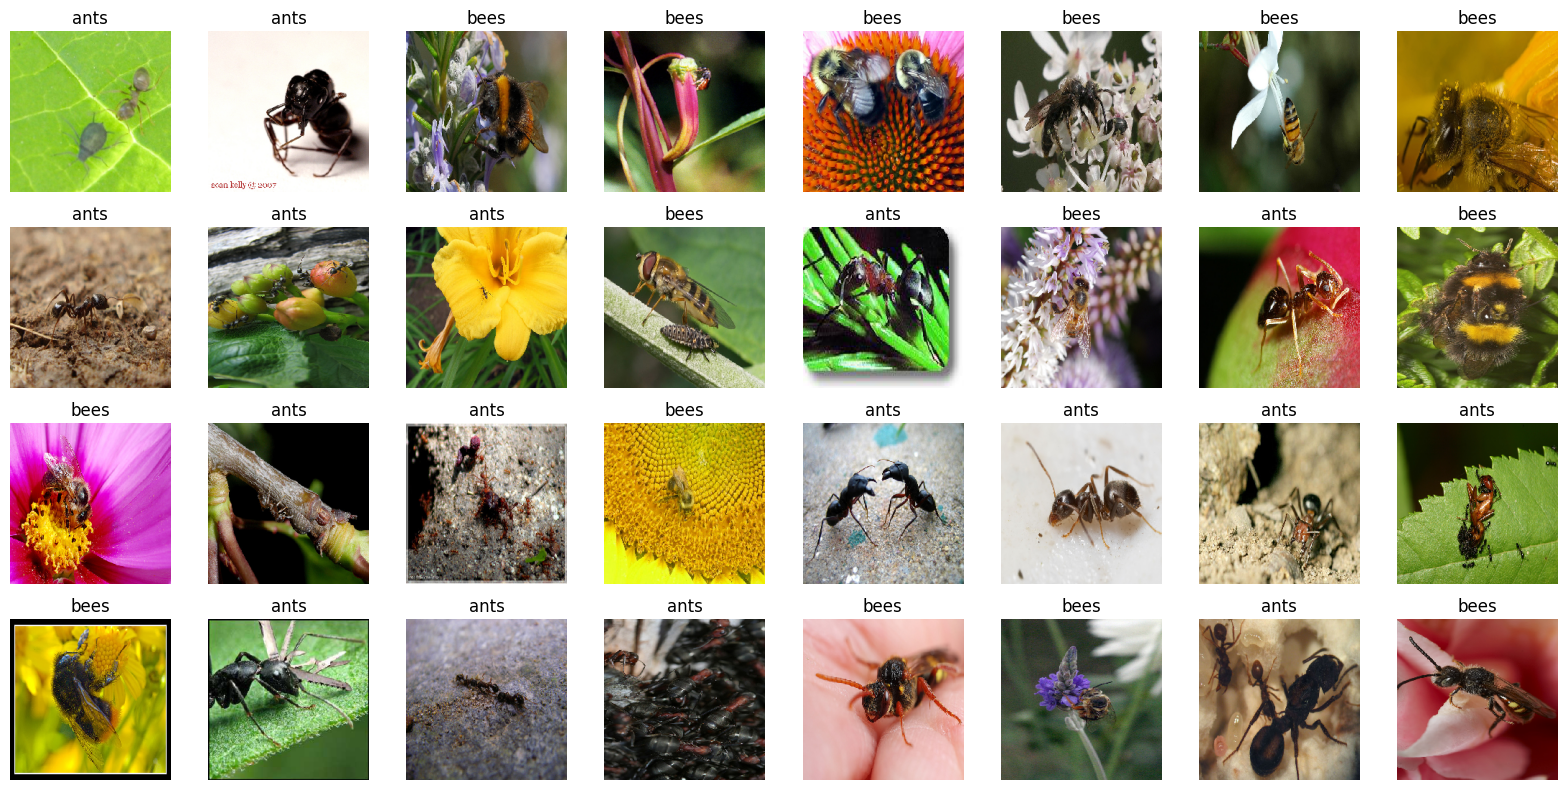

In [ ]:
# Get a batch of images and labels from the generator
images, labels = next(train_generator)

# Get the class names for the labels
class_names = list(train_generator.class_indices.keys())

# Plot the images with their labels
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(class_names[np.argmax(labels[i])])
    ax.axis('off')
plt.tight_layout()
plt.show()

**CNN model architecture**

In [ ]:
# Define the CNN model architecture
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
# Train the CNN model
epochs = 10

cnn_history = cnn_model.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)



Epoch 1/10
7/7 [==============================] - 31s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 36s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 36s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 31s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 36s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 36s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 31s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
7/7 [==================

In [ ]:
# Plot the training and validation loss for the CNN model
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



In [ ]:
# Plot the training and validation accuracy for the CNN model
plt.figure(figsize=(12, 4))
plt.subplot(1,2,2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



1/1 [==============================] - 0s 270ms/step


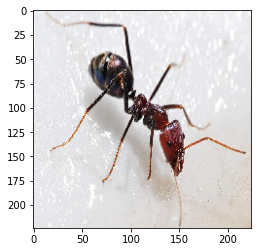

In [ ]:
# Predict a new ant image using the CNN model
from tensorflow.keras.preprocessing import image

img_path = '/content/ANT.jpg'

img = image.load_img(img_path, target_size=(img_height, img_width))

img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch of 1 image
pred = cnn_model.predict(img_array)
pred_class = np.argmax(pred)
plt.imshow(img)

In [ ]:
if pred_class == 0:
    print('The image is classified as an ant.')
else:
    print('The image is classified as a bee.')

The image is classified as an ant.


In [ ]:
# Output the training and validation accuracy of the CNN model
train_acc = cnn_history.history['accuracy'][-1]
val_acc = cnn_history.history['val_accuracy'][-1]

print('Training Accuracy: {:.2f}%'.format(train_acc * 100))
print('validation Accuracy: {:.2f}%'.format(val_acc * 100))

Training Accuracy: 74.06%
validation Accuracy: 60.16%


**VGG-16**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# Load the pre-trained VGG16 model without the top layer
vgg_model = VGG16(include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the layers in the pre-trained VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Add the top layers to the VGG16 model
vgg_model = tf.keras.Sequential([
    vgg_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the VGG16 model
vgg_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the VGG16 model
epochs = 10

vgg_history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)

Epoch 1/10
7/7 [==============================] - 199s 30s/step - loss: 3.1873 - accuracy: 0.5377 - val_loss: 0.4753 - val_accuracy: 0.7891
Epoch 2/10
7/7 [==============================] - 194s 29s/step - loss: 0.9376 - accuracy: 0.6604 - val_loss: 0.4959 - val_accuracy: 0.7656
Epoch 3/10
7/7 [==============================] - 191s 29s/step - loss: 0.5990 - accuracy: 0.7406 - val_loss: 0.4544 - val_accuracy: 0.7812
Epoch 4/10
7/7 [==============================] - 197s 30s/step - loss: 0.3659 - accuracy: 0.8259 - val_loss: 0.3903 - val_accuracy: 0.8438
Epoch 5/10
7/7 [==============================] - 174s 26s/step - loss: 0.2669 - accuracy: 0.9057 - val_loss: 0.3753 - val_accuracy: 0.8438
Epoch 6/10
7/7 [==============================] - 172s 26s/step - loss: 0.2260 - accuracy: 0.9198 - val_loss: 0.4165 - val_accuracy: 0.8203
Epoch 7/10
7/7 [==============================] - 174s 26s/step - loss: 0.1922 - accuracy: 0.9340 - val_loss: 0.3948 - val_accuracy: 0.8594
Epoch 8/10
7/7 [====

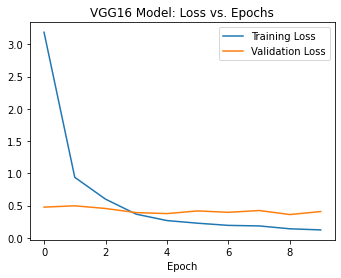

In [ ]:
# Plot the training and validation loss of the VGG16 model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['loss'], label='Training Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('VGG16 Model: Loss vs. Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.show()

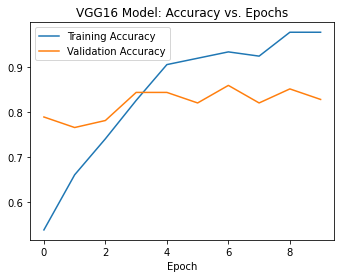

In [ ]:
# Plot the training and validation ACCURACY of the VGG16 model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('VGG16 Model: Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 [==============================] - 0s 484ms/step


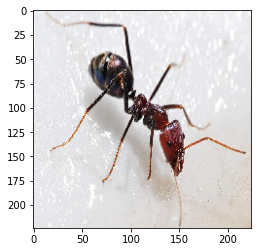

In [ ]:
# Predict a new ant image using the VGG16 model
from tensorflow.keras.preprocessing import image

img_path = '/content/ANT.jpg'

img =  image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch of 1 image
pred = vgg_model.predict(img_array)
pred_class = np.argmax(pred)
plt.imshow(img)

In [ ]:
if pred_class == 0:
    print('The image is classified as an ant.')
else:
    print('The image is classified as a bee.')


The image is classified as an ant.


In [ ]:
# Get the training and validation accuracy of the VGG16 model
train_acc = vgg_history.history['accuracy'][-1]
val_acc = vgg_history.history['val_accuracy'][-1]

print('VGG16 Model training accuracy: {:.2f}%'.format(train_acc * 100))
print('VGG16 Model validation accuracy: {:.2f}%'.format(val_acc * 100))


VGG16 Model training accuracy: 97.77%
VGG16 Model validation accuracy: 82.81%
